In [11]:
# Cuisine Classification - Cognifyz Internship Task

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
# Step 2: Load Dataset
# Replace 'Dataset.csv' with your actual file name
df = pd.read_csv('Dataset .csv')

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [13]:
# Step 3: Preprocessing

# Fill missing cuisines and take only the first cuisine
df['Cuisines'] = df['Cuisines'].fillna('Unknown').apply(lambda x: x.split(',')[0].strip())

# Encode target variable
le_target = LabelEncoder()
df['Cuisines'] = le_target.fit_transform(df['Cuisines'])

# Features to use
features = [
    'Country Code', 'City', 'Longitude', 'Latitude', 'Average Cost for two',
    'Currency', 'Has Table booking', 'Has Online delivery',
    'Is delivering now', 'Price range', 'Aggregate rating', 'Votes'
]

# Encode categorical features
for col in df[features].select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df[features]
y = df['Cuisines']

In [14]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Step 5: Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Step 6: Predictions
y_pred = model.predict(X_test)

In [17]:
# Step 7: Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.23      0.33      0.27        46
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           6       0.10      0.08      0.09        13
           8       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         3
          12       0.20      0.23      0.21       112
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         3
          15       0.17      0.11      0.13        19
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00        18
          18       0.40      0.67      0.50         3
          19       0.00      0.00      0.00         8
          20       0.25      0.25      0.25         4
    

C:\Users\Pranjali Rajguru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pranjali Rajguru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pranjali Rajguru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pranjali Rajguru\anac

In [18]:
# Step 8: Cuisine-wise Performance
report = classification_report(y_test, y_pred, output_dict=True,zero_division=0)
report_df = pd.DataFrame(report).T
print(report_df.head())

   precision    recall  f1-score  support
0   0.000000  0.000000  0.000000      0.0
1   0.000000  0.000000  0.000000      0.0
2   0.234375  0.326087  0.272727     46.0
3   0.000000  0.000000  0.000000      1.0
4   0.000000  0.000000  0.000000      0.0


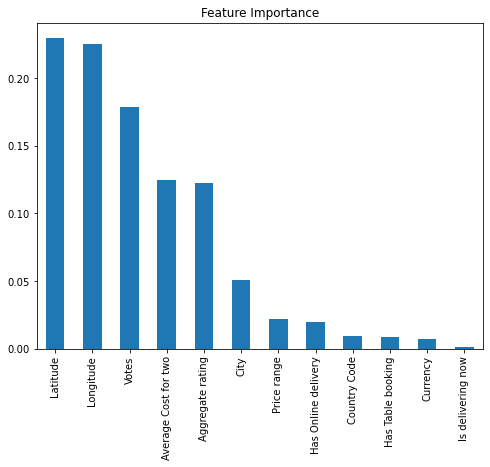

In [19]:
# Step 9: Feature Importance
import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8,6))
importances.plot(kind='bar')
plt.title("Feature Importance")
plt.show()